# Exercise 8

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from mpl_toolkits import mplot3d

from sklearn.neighbors import KernelDensity

# for creating a flattened plot
%matplotlib inline

In [2]:
# Load the data
Dataset = sio.loadmat('Dataset.mat')
X1 = Dataset['X1']
X2 = Dataset['X2']


## 8.a Based on 𝑋1, estimate the values of 𝑝1(𝒙) at the following points:
𝒙1=(2.01,2.99,3.98,5.02)<br>
𝒙2=(20.78,−15.26,19.38,−25.02)<br>
𝒙3=(3.08,3.88,4.15,6.02)

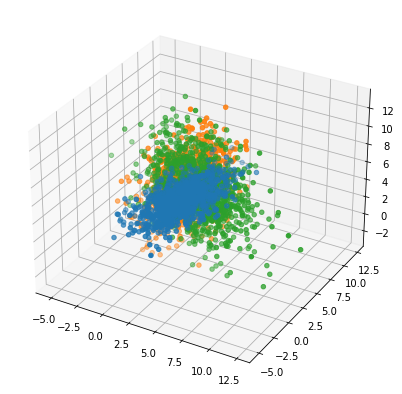

In [3]:
# Plot the data in pairs to see the distribution
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")


ax.scatter3D(X1[:,0], X1[:,1], X1[:,2])
ax.scatter3D(X1[:,0], X1[:,2], X1[:,3])
_ = ax.scatter3D(X1[:,1], X1[:,2], X1[:,3])

### Parametric Approach

We will use the gaussian mixture model approach, using one component (since our data looks like is gathered around one cluster)

In [4]:
# Parametric approach
gm_1 = GaussianMixture(n_components=1, random_state=0).fit(X1)
mean = gm_1.means_
cov = gm_1.covariances_
mean

array([[1.88364427, 2.94930523, 3.94277602, 4.91643708]])

In [5]:
x_1 = np.array([
    [2.01, 2.99, 3.98 , 5.02],
    [20.78, -15.26, 19.38, -25.02],
    [3.08, 3.88, 4.15, 6.02]
    ])

In [6]:
for i, x_i in enumerate(x_1):

    cov_norm = np.linalg.norm(cov)**1/2
    cov_inv = np.linalg.inv(cov)
    x_mu = x_i - mean
    print(f"p(x{i+1}): = ", f"{(1/ ( (2*np.pi)**2 * cov_norm )) * np.exp(-0.5 * (x_mu).dot(cov_inv).dot((x_mu).T))[0][0][0]:.4f}")

p(x1): =  0.0051
p(x2): =  0.0000
p(x3): =  0.0030


### Non Parametric Approach

We will use the Krnel Density Method to compute a gaussian kernel density estimate with an h of 1.<br>
[Source](https://sebastianraschka.com/Articles/2014_kernel_density_est.html#Summarizing-the-implementation-of-the-Parzen-window%20estimation-with-a-hypercube-kernel)

In [7]:
def parzen_window_est(x_samples, h, center):
    '''
    Implementation of the Parzen-window estimation for hypercubes.

    Keyword arguments:
        x_samples: A 'n x d'-dimensional numpy array, where each sample
            is stored in a separate row.
        h: The length of the hypercube.
        center: The coordinate center of the hypercube

    Returns the probability density for observing k samples inside the hypercube.

    '''
    dimensions = x_samples.shape[1]

    assert (len(center) == dimensions), 'Number of center coordinates have to match sample dimensions'
    k = 0
    for x in x_samples:
        is_inside = 1
        for axis,center_point in zip(x, center):
            if np.abs(axis-center_point) > (h/2):
                is_inside = 0
        k += is_inside
    return f"{(k / len(x_samples)) / (h**dimensions):.4f}"

for i, x_i in enumerate(x_1):
    # print('p(x) =', parzen_window_est(X1, h=1))
    print(f"p(x{i+1}) = ", parzen_window_est(X1, 1, x_i))

p(x1) =  0.0060
p(x2) =  0.0000
p(x3) =  0.0020


## 8.b Based on 𝑋2, estimate the values of 𝑝2(𝒙) at the following points:
𝒙1=(0.05,0.15,−0.12,−0.08)<br> 
𝒙2=(7.18,7.98,9.12,9.94)<br>
𝒙3=(3.48,4.01,4.55,4.96)<br> 
𝒙4=(20.78,−15.26,19.38,−25.02).

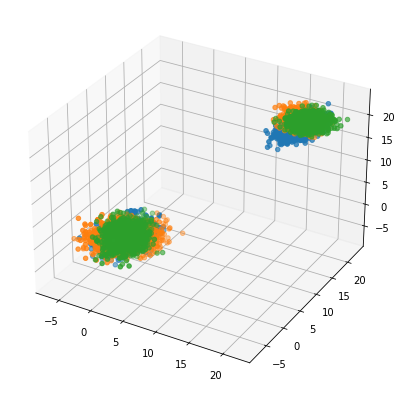

In [8]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")


ax.scatter3D(X2[:,0], X2[:,1], X2[:,2])
ax.scatter3D(X2[:,0], X2[:,2], X2[:,3])
_ = ax.scatter3D(X2[:,1], X2[:,2], X2[:,3])

In [9]:
# Parametric approach
gm_2 = GaussianMixture(n_components=2, random_state=0).fit(X2)
mean = gm_2.means_
cov = gm_2.covariances_
mean

array([[ 1.69885937e+01,  1.79929660e+01,  1.89933557e+01,
         1.99915999e+01],
       [ 2.80527613e-03,  3.24565079e-02, -1.33126366e-01,
         8.13765609e-02]])

In [10]:
# define X2 to take values for the predictions
x_2 = np.array([
    [0.05,0.15,-0.12,-0.08],
    [7.18,7.98,9.12,9.94],
    [3.48,4.01,4.55,4.96],
    [20.78,-15.26,19.38,-25.02]
    ])


In [11]:
# for each x calculate the corresponding p(x)
for i, x_i in enumerate(x_2):
    p1 = gm_2.predict_proba([x_2[0]])[0][0]
    p2 = gm_2.predict_proba([x_2[0]])[0][1]

    cov_norm_1, cov_norm_2 = np.linalg.norm(cov[0])**1/2, np.linalg.norm(cov[1])**1/2
    cov_inv_1, cov_inv_2 = np.linalg.inv(cov[0]), np.linalg.inv(cov[1])
    x_mu_1, x_mu_2 = x_i - mean[0], x_i - mean[1]

    p_x_1 = 1/ ( (2*np.pi)**2 * cov_norm_1 ) * np.exp(-0.5 * (x_mu_1).dot(cov_inv_1).dot((x_mu_1).T))
    p_x_2 = 1/ ( (2*np.pi)**2 * cov_norm_2 ) * np.exp(-0.5 * (x_mu_2).dot(cov_inv_2).dot((x_mu_2).T))

    P1_x = p1 * p_x_1 / (p1 * p_x_1 + p2 *p_x_2)
    P2_x = p2 * p_x_2 / (p1 * p_x_1 + p2 *p_x_2)
    print(f"p(x{i+1}): ", f"{p1 * p_x_1 + p2 *p_x_2:.4f}")

p(x1):  0.0050
p(x2):  0.0000
p(x3):  0.0000
p(x4):  0.0000


### Non Parametric Approach

We will use the Kernel Density Method to compute a gaussian kernel density estimate with an h of 1.<br>
[Source](https://sebastianraschka.com/Articles/2014_kernel_density_est.html#Summarizing-the-implementation-of-the-Parzen-window%20estimation-with-a-hypercube-kernel)

In [12]:
for i, x_i in enumerate(x_2):
    # print('p(x) =', parzen_window_est(X1, h=1))
    print(f"p(x{i+1}) = ", parzen_window_est(X2, 1, x_i))

p(x1) =  0.0005
p(x2) =  0.0000
p(x3) =  0.0000
p(x4) =  0.0000


* We observe that in both cases we get similar results for both cases.

Looking at the data points and the means of the distributions, it looks like our code has worked as expected. In the first case, the first point is $x_1=(2.01,2.99,3.98,5.02)$ and the mean is $\mu = (1.88364427, 2.94930523, 3.94277602, 4.91643708)$ with the corresponding $p(x_1)$ being $p(x_1) =  0.0060$. 

On the other hand the second point is $x_2=(20.78,−15.26,19.38,−25.02)$ with $p(x_2) =  0.0060$.

This makes sense as the further away from the calculated mean we are, the lower the value of the probability density function will be.